#  Анализ номинативных данных

In [20]:
import statistics
import seaborn as sns
import statsmodels.api as sm

import statsmodels.formula.api as smf

from scipy import stats
from numpy import random

<div class="alert alert-warning">
<h2> Постановка задачи </h2>

</div>

 - если две перенные количественные: корреляция, регрессия
 - если одна номинативная, а другая колличесвенная: то есть при сравнии групп разумно использовать t-тест и дисперсионный анализ

Для номинальной переменной строим распределение сколько раз встречалась та или иная градачия номинативной перменнйо

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import random
random.seed(9001)
import pandas as pd
x = np.random.randint(1, 60, size=(60))
y = [random.choice(['A', 'B', 'C']) for i in range(60)]
df = pd.DataFrame({'x': x, 'y': y})

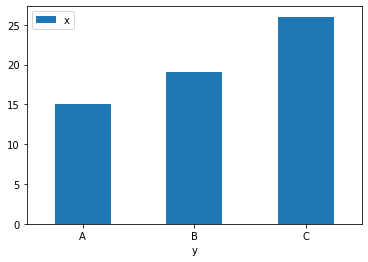

In [4]:
df.pivot_table(index ='y', values = 'x', aggfunc = 'count') \
  .reset_index().plot(kind = 'bar', x = 'y')
plt.xticks(rotation = 0)
plt.show()

**Гитотеза:** импирическое распределение частот в выборки отличается от некоторого заданного РАВНОМЕРНОГО

<div class="alert alert-warning">
<h2> Расстояние Пирсона </h2>

</div>

H0: Распределение частот не отличимо от ожидаемого

H1: Распределение частот отличимо от ожидаемого

Задача: Определить, насколько статистически значимы различия между ожидаемыми и эмпирическими значениями


Расстояние Хи-квадрат:

$$χ² ={(\frac{∑(O_i - E_i)}{\sqrt{(E_i}})^{2}} = \frac{∑(O_i - E_i)^{2}}{\sqrt{(E_i}}$$

нормируем на корень так как пирсон доказал, что при верной нулевой гитотезе флуктуация наблюдаемого знаечния относительно ожидаемого значения частоты пропорциональна квадрату 

где  значения $O_i$ (Observed) - наблюдаемые частоты, $E_i$ (Expexted) - ожидаемые частоты.

**Проверка монетки на четность:**
 - нулевая гипотеза вероятности раные 0.5
 - прейти к оценке частоты номинативной перемнной

In [8]:
eagle = 40 
tails = 20
N = eagle + tails

In [9]:
E_eagle = 30
E_tails = 30

In [18]:
print('как ожидаемые значения отклонятся от наблюдаемых{}'.format((20 - 30)**2 /30+ (40 - 30)**2 /30))

как ожидаемые значения отклонятся 6.666666666666667


In [21]:
#from scipy import stats

chi2_value, chi2_pvalue = stats.chisquare([18, 55, 27], f_exp=[25, 50, 25]) 
# Первый массив - эмпирические значения
# Второй массив(f_exp=) - ожидаемые значения, можно не указывать, если ожидаемые значения равномерны

print(f'Хи-квадрат = {chi2_value:.2f}, p = {chi2_pvalue:.3f}')

Хи-квадрат = 2.62, p = 0.270


In [23]:
import random
from math import sqrt

def distance_chi_square_from_toss_coin():
    eagles = 0
    tails = 0
    # подбрасываем монету 60 раз
    for i in range(60):
        if random.randint(0,1):
            eagles += 1
        else:
            tails += 1
    # расчитываем расстояние хи-квадрат Пирсона: 
    # ((O1 - E1)|sqrt(E1))^2 + ... + ((On - En)|sqrt(En))^2
    return (
        (eagles-30)**2/30 + (tails-30)**2/30
    )

/Users/krivonos.no/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


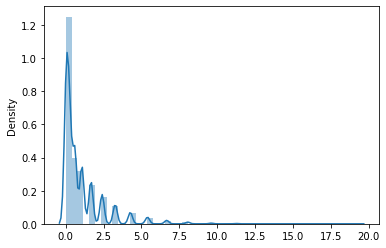

In [28]:
# делаем эксперимент 10 тыс.раз, 
# в каждом из которых по 60 раз будем подбрасывать монету 
# и сохранять возвращаемое значение расстояния хи-квадрат
list_of_chi_square = []
for i in range(100000):
    list_of_chi_square.append(distance_chi_square_from_toss_coin())
import seaborn as sns

sns.distplot(list_of_chi_square);

In [29]:
# посмотрим еще раз на значение, которое мы получали в нашем 
# конкретном наблюдении с выпаданием орла и решки (когда получили 40 орлов!):
exp_eagles = 40
exp_tails = 20
# расчитываем расстояние хи-квадрат Пирсона: 
# ((O1 - E1)|sqrt(E1))^2 + ... + ((On - En)|sqrt(En))^2
res_of_exp_chi_2 = (exp_eagles-30)**2/30 + (exp_tails-30)**2/30

In [30]:
# посмотрим % значений с равным или большим значением нашего конкретного наблюдения:
count_of_result_or_more_like_we_see = 0
for i in list_of_chi_square:
    if i >= res_of_exp_chi_2:
        count_of_result_or_more_like_we_see += 1;
print(count_of_result_or_more_like_we_see)

1314


In [41]:
# % вероятности получить такие расхождения
print(count_of_result_or_more_like_we_see / len(list_of_chi_square))
print('Или с вероятность {:.3f} мы могли получить такое (40 раз!) \
        \nвыпадение орла при 60-ти подбрасываниях честной монеты'.format(count_of_result_or_more_like_we_see / len(list_of_chi_square)))

0.01314
Или с вероятность 0.013 мы могли получить такое (40 раз!)         
выпадение орла при 60-ти подбрасываниях честной монеты
